### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from phik import phik_matrix

In [2]:
df = pd.read_csv('dataSets/taxi_trip_pricing.csv')

### Analysis

In [3]:
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


### Baseline Data Cleaning

In [5]:
df.isna().sum()

Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64

In [6]:
# There seems to be some kind of pattern? Let's actually see the entries
df[df.isna().any(axis=1)]

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180
6,3.85,Afternoon,Weekday,4.0,High,Rain,3.51,1.66,NaN,5.05,11.2645
7,43.44,Evening,Weekend,3.0,NaN,Clear,2.97,1.87,0.23,NaN,101.1216
...,...,...,...,...,...,...,...,...,...,...,...
991,35.04,Morning,Weekend,4.0,Medium,Rain,2.90,1.10,0.15,9.99,NaN
993,NaN,Morning,Weekday,3.0,Medium,Clear,2.65,1.35,NaN,25.61,55.3348
996,45.95,Night,Weekday,4.0,Medium,Clear,3.12,0.61,NaN,61.96,62.1295
997,7.70,Morning,Weekday,3.0,Low,Rain,2.08,1.78,NaN,54.18,33.1236


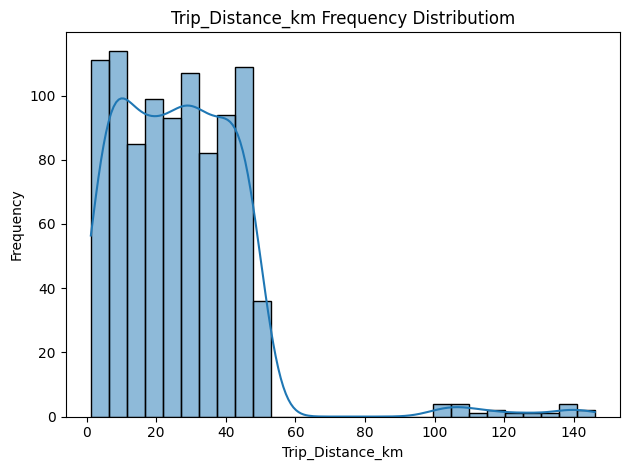

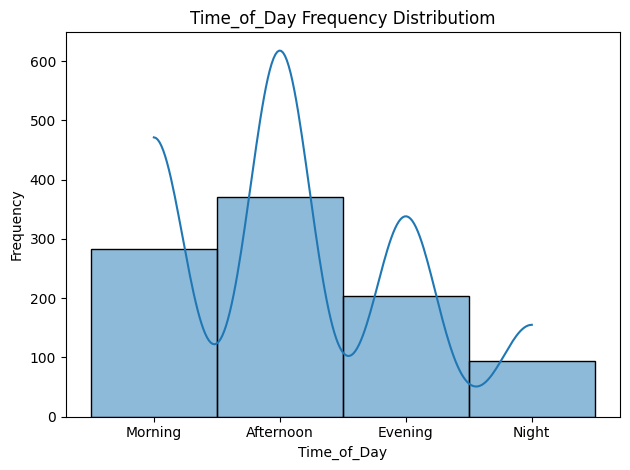

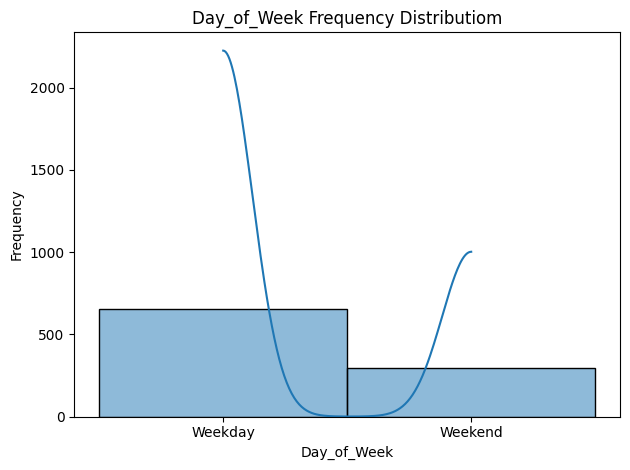

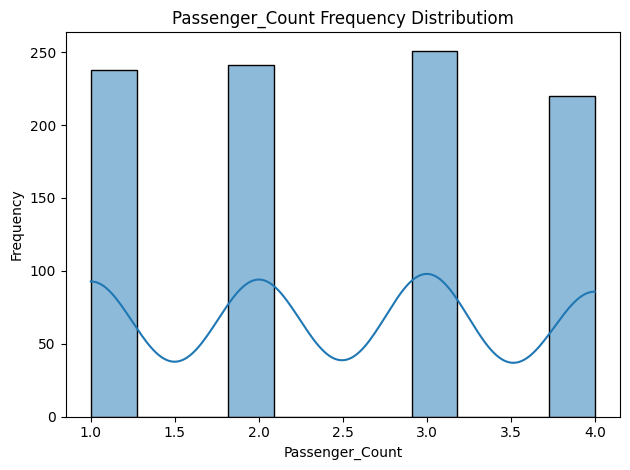

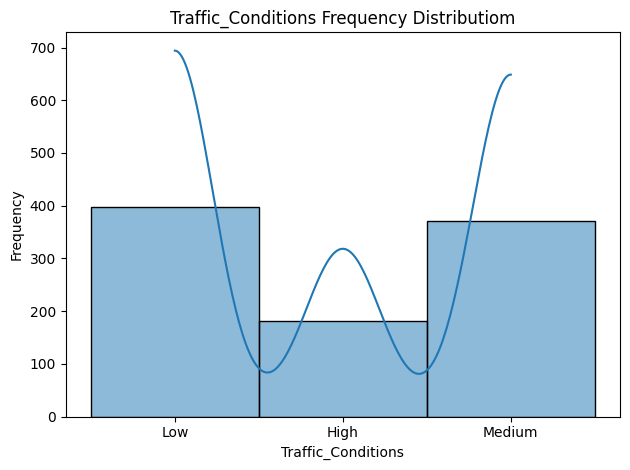

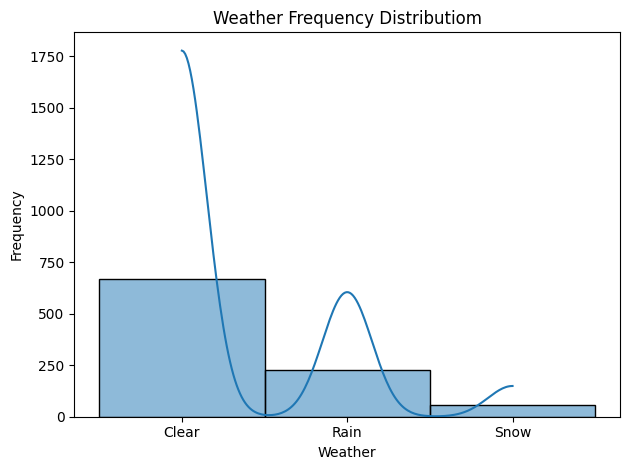

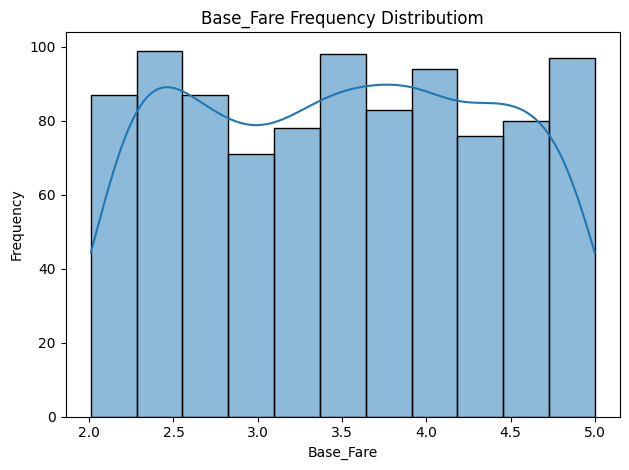

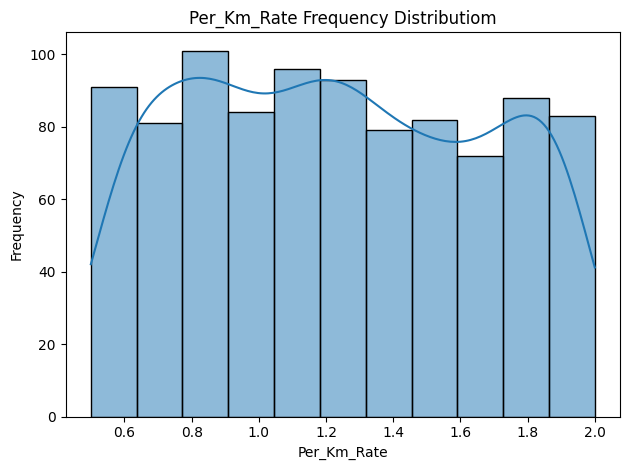

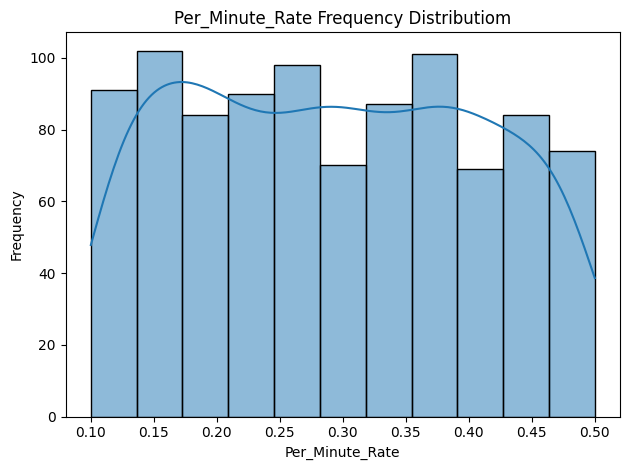

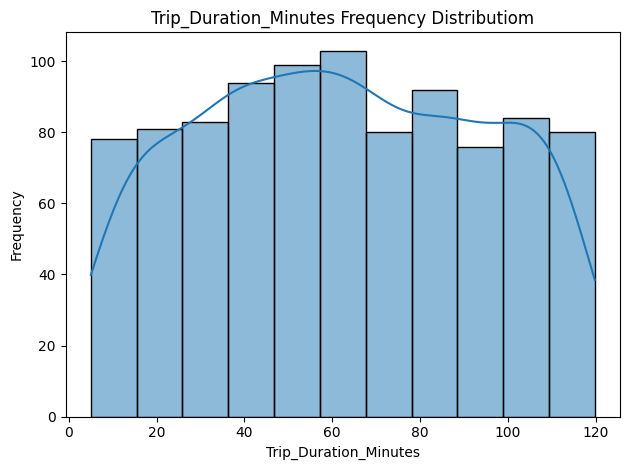

In [7]:
# Okay so it looks like there was no trend. Let's check the distribution on these values to see what we want to do

for col in df.columns[:-1]:
    plt.figure()
    sns.histplot(data=df[col], kde=True)
    plt.title(f"{col} Frequency Distributiom")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

In [8]:
# It looks like Trip_Distance_km is right skewed but the other ones are relatively normal distribution. Let's also check .skew
quantitativeFeatures = df.select_dtypes(include="number").columns.tolist()
df[quantitativeFeatures].skew()

Trip_Distance_km         2.236010
Passenger_Count          0.016255
Base_Fare               -0.005149
Per_Km_Rate              0.079206
Per_Minute_Rate          0.058695
Trip_Duration_Minutes    0.017749
Trip_Price               3.732561
dtype: float64

In [9]:
df[df.isna().any(axis=1)]

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180
6,3.85,Afternoon,Weekday,4.0,High,Rain,3.51,1.66,NaN,5.05,11.2645
7,43.44,Evening,Weekend,3.0,NaN,Clear,2.97,1.87,0.23,NaN,101.1216
...,...,...,...,...,...,...,...,...,...,...,...
991,35.04,Morning,Weekend,4.0,Medium,Rain,2.90,1.10,0.15,9.99,NaN
993,NaN,Morning,Weekday,3.0,Medium,Clear,2.65,1.35,NaN,25.61,55.3348
996,45.95,Night,Weekday,4.0,Medium,Clear,3.12,0.61,NaN,61.96,62.1295
997,7.70,Morning,Weekday,3.0,Low,Rain,2.08,1.78,NaN,54.18,33.1236


In [10]:
# Okay so we will try to fix the skewness of Trip_Distance_km and Trip_Price once we are done dealing with missing values and duplicates
# But otherwise it looks like we will be using median for those two quantitative features, mean for the rest of quantitative features
# And ofcourse for categorical, we will use most frequent

# Step 1: Numeric columns skew check
skew_vals = df[quantitativeFeatures].skew()

lowSkewCategories = skew_vals[abs(skew_vals) < 0.5].index.tolist()
highSkewCategories = skew_vals[abs(skew_vals) >= 0.5].index.tolist()

# Step 2: Fill numeric columns
for cat in lowSkewCategories:
    df[cat] = df[cat].fillna(df[cat].mean())

for cat in highSkewCategories:
    df[cat] = df[cat].fillna(df[cat].median())

# Step 3: Fill categorical columns with most frequent value
categoricalFeatures = df.select_dtypes(include="object").columns.tolist()

for cat in categoricalFeatures:
    if df[cat].isna().any():  # Only fill if there are missing values
        df[cat] = df[cat].fillna(df[cat].mode()[0])


In [11]:
df.isna().sum()

Trip_Distance_km         0
Time_of_Day              0
Day_of_Week              0
Passenger_Count          0
Traffic_Conditions       0
Weather                  0
Base_Fare                0
Per_Km_Rate              0
Per_Minute_Rate          0
Trip_Duration_Minutes    0
Trip_Price               0
dtype: int64

In [12]:
df[df.duplicated()]

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price


In [13]:
# Now we can work on fixing skewness of Trip_Distance_km and Trip_Price
df["Trip_Distance_km"] = np.log1p(df["Trip_Distance_km"])
df["Trip_Price"] = np.log1p(df["Trip_Price"])
df[quantitativeFeatures].skew()

Trip_Distance_km        -0.786009
Passenger_Count          0.016676
Base_Fare               -0.005283
Per_Km_Rate              0.081258
Per_Minute_Rate          0.060215
Trip_Duration_Minutes    0.018209
Trip_Price              -0.009769
dtype: float64

In [14]:
# Okay I am happy with that skewness so we can now move forward with data structuring

### Data Structuring

In [15]:
# Before we start looking at the heatmap to understand relationships, let's encode categorical data

df[categoricalFeatures].head()

,Time_of_Day,Day_of_Week,Traffic_Conditions,Weather
0,Morning,Weekday,Low,Clear
1,Afternoon,Weekday,High,Clear
2,Evening,Weekend,High,Clear
3,Evening,Weekday,Low,Clear
4,Evening,Weekday,High,Clear


In [16]:
print(df["Traffic_Conditions"].unique())
print(df["Time_of_Day"].unique())


['Low' 'High' 'Medium']
['Morning' 'Afternoon' 'Evening' 'Night']


In [17]:
# Traffic Conditions and Time_of_Day are ordinal
# Day_of_Week and Weather are nominal

# Ordinal Features
from sklearn.preprocessing import LabelEncoder

traffic_conditions_map = { 'Low': 0, 'Medium': 1, 'High': 2 }
df["Traffic_Conditions"] = df["Traffic_Conditions"].map(traffic_conditions_map)

time_of_day_map = { 'Morning': 0, 'Afternoon': 1, 'Evening': 2, 'Night': 3 }
df["Time_of_Day"] = df["Time_of_Day"].map(time_of_day_map)

# Nominal Features (Normally we would use one hot encoding but we will need numeric features for xgboost so we will use label encoder)
# df = pd.get_dummies(df, columns=["Day_of_Week", "Weather"])
le = LabelEncoder()
df["Day_of_Week"] = le.fit_transform(df["Day_of_Week"])
le = LabelEncoder()
df["Weather"] = le.fit_transform(df["Weather"])

In [18]:
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,3.013081,0,0,3.0,0,0,3.560000,0.80,0.32,53.82,3.617985
1,3.883418,1,0,1.0,2,0,3.502989,0.62,0.43,40.57,3.933285
2,3.634159,2,1,1.0,2,0,2.700000,1.21,0.15,37.27,3.987190
3,3.444576,2,0,4.0,0,0,3.480000,0.51,0.15,116.81,3.623535
4,3.289521,2,0,3.0,2,0,2.930000,0.63,0.32,22.64,2.810486


In [19]:
# Now we can finally move into model development

### Model Development

In [20]:
# We will create a baseline model for linear regression, decision forest, random forest, and xgboost and then the model that works best,
# we wil tune further using GridSearchCV

In [21]:
# train_test_split
from sklearn.model_selection import train_test_split

target = 'Trip_Price'
X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

interval columns not set, guessing: ['Trip_Distance_km', 'Time_of_Day', 'Day_of_Week', 'Passenger_Count', 'Traffic_Conditions', 'Weather', 'Base_Fare', 'Per_Km_Rate', 'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price']


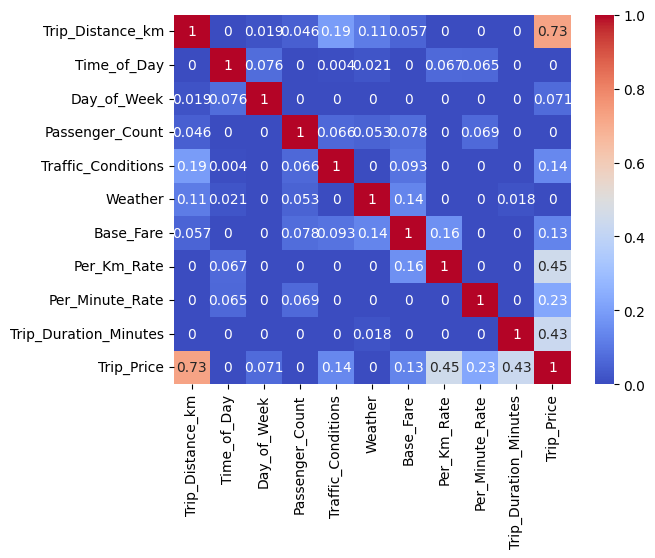

In [27]:
corr = df.phik_matrix()
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.show()

In [28]:
# Linear Regression
from sklearn.linear_model import LinearRegression

baselineLinearRegressor = LinearRegression()
baselineLinearRegressor.fit(X_train, y_train)

LinearRegression()

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = baselineLinearRegressor.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² score:", r2_score(y_test, y_pred))

MAE: 0.14757169354611274
RMSE: 0.21607894633010763
R² score: 0.8412771433545464


In [35]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor

baselineDecisionTree = DecisionTreeRegressor(random_state=42)
baselineDecisionTree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [36]:
y_pred = baselineDecisionTree.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² score:", r2_score(y_test, y_pred))

MAE: 0.1987960368040772
RMSE: 0.27395735102221735
R² score: 0.7448588663933888


In [37]:
from sklearn.ensemble import RandomForestRegressor

baselineRandomForest = RandomForestRegressor(random_state=42)
baselineRandomForest.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [38]:
y_pred = baselineRandomForest.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² score:", r2_score(y_test, y_pred))

MAE: 0.11026076002770106
RMSE: 0.16079013698158665
R² score: 0.9121112323997995


In [40]:
from xgboost import XGBRegressor

baselineXGBoost = XGBRegressor()
baselineXGBoost.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [42]:
y_pred = baselineXGBoost.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² score:", r2_score(y_test, y_pred))

MAE: 0.1162505173138269
RMSE: 0.16699963912259022
R² score: 0.9051918592957152


In [43]:
# Random Forest and XGBoost had the best results
# Let's choose Random Forest for tuning

In [44]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['squared_error', 'absolute_error'],
    'max_depth': [10, 100, None],
    'min_samples_split': [2, 10, 50, 100],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['sqrt', 'log2', None],
}

tunedRandomForestRegressor = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, 
                                          scoring='neg_mean_absolute_error', verbose=1, n_jobs=1)
tunedRandomForestRegressor.fit(X_train, y_train)
tunedRandomForestRegressorModel = tunedRandomForestRegressor.best_estimator_

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


In [45]:
y_pred = tunedRandomForestRegressorModel.predict(X_test)

print("Best Parameters:", tunedRandomForestRegressor.best_params_)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² score:", r2_score(y_test, y_pred))

Best Parameters: {'criterion': 'squared_error', 'max_depth': 100, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
MAE: 0.11026076002770106
RMSE: 0.16079013698158665
R² score: 0.9121112323997995
